In [1]:
%pylab inline
from pygadgetreader import *
from octopus import density, orbit_cm
import yt
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


# To DO:

Phase plots oof isolated MW that evolves in time!

In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [68]:
all_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
all_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
all_pid_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

all_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
all_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
all_pid_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [69]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [70]:
def norm_vector(pos, vel):
    r_i_norm = np.zeros((len(pos),3))
    for i in range(len(pos)):
        r_i_norm[i] = pos[i] / (sum(pos[i][j] for j in range(len(pos[i]))))
    return r_i_norm

def normalize(pos, vel):
    norm_pos = norm_vector(pos, vel)
    v_r = np.zeros(len(pos))
    for i in range(len(pos)):
        v_r[i] = dot(vel[i], norm_pos[i])
    return v_r

In [71]:
# selecting MW and LMC particles
mw_pos_i, mw_vel_i, lmc_pos_i, lmc_vel_i = mw_particles(all_pos_i, all_vel_i, all_pid_i, 1000000) 
mw_pos_f, mw_vel_f, lmc_pos_f, lmc_vel_f = mw_particles(all_pos_f, all_vel_f, all_pid_f, 1000000) 

In [72]:
# Removing particiles at infty
xmw_cm, ymw_cm, zmw_cm, vxmw_cm, vymw_cm, vzmw_cm = orbit_cm.CM(mw_pos_f, mw_vel_f)
xlmc_cm, ylmc_cm, zlmc_cm, vxlmc_cm, vylmc_cm, vzlmc_cm = orbit_cm.CM(lmc_pos_f, lmc_vel_f)
xlmc_cmi, ylmc_cmi, zlmc_cmi, vxlmc_cmi, vylmc_cmi, vzlmc_cmi = orbit_cm.CM(lmc_pos_i, lmc_vel_i)

print xmw_cm, ymw_cm, zmw_cm
print xlmc_cmi, ylmc_cmi, zlmc_cmi
print xlmc_cm, ylmc_cm, zlmc_cm


mw_clean_i = np.where(np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)<800)[0]
mw_clean_f = np.where(np.sqrt((mw_pos_f[:,0]-xmw_cm)**2.0 + (mw_pos_f[:,1]-ymw_cm)**2.0 + (mw_pos_f[:,2]-zmw_cm)**2.0)<800)[0]

lmc_clean_i = np.where(np.sqrt((lmc_pos_i[:,0]-xlmc_cmi)**2.0 + (lmc_pos_i[:,1]-ylmc_cmi)**2.0 + (lmc_pos_i[:,2]-zlmc_cmi)**2.0)<500)[0]
lmc_clean_f = np.where(np.sqrt((lmc_pos_f[:,0]-xlmc_cm)**2.0 + (lmc_pos_f[:,1]-ylmc_cm)**2.0 + (lmc_pos_f[:,2]-zlmc_cm)**2.0)<500)[0]

mw_pos_i = mw_pos_i[mw_clean_i]
mw_vel_i = mw_vel_i[mw_clean_i]
mw_pos_f = mw_pos_f[mw_clean_f]
mw_vel_f = mw_vel_f[mw_clean_f]

lmc_pos_i = lmc_pos_i[lmc_clean_i]
lmc_vel_i = lmc_vel_i[lmc_clean_i]
lmc_pos_f = lmc_pos_f[lmc_clean_f]
lmc_vel_f = lmc_vel_f[lmc_clean_f]

vr_mw_i = normalize(mw_pos_i, mw_vel_i)
vr_mw_f = normalize(mw_pos_f, mw_vel_f)

vr_lmc_i = normalize(lmc_pos_i, lmc_vel_i)
vr_lmc_f = normalize(lmc_pos_f, lmc_vel_f)

r_mw_i = np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)
r_mw_f = np.sqrt((mw_pos_f[:,0]-xmw_cm)**2.0 + (mw_pos_f[:,1]-ymw_cm)**2.0 + (mw_pos_f[:,2]-zmw_cm)**2.0)

r_lmc_i = np.sqrt((lmc_pos_i[:,0])**2.0 + (lmc_pos_i[:,1])**2.0 + (lmc_pos_i[:,2])**2.0)
r_lmc_f = np.sqrt((lmc_pos_f[:,0]-xmw_cm)**2.0 + (lmc_pos_f[:,1]-ymw_cm)**2.0 + (lmc_pos_f[:,2]-zmw_cm)**2.0)

3.14213492468 33.1085245965 -10.5106429199
11.5791685785 247.827350217 129.886171086
1.95962845506 -11.9165978387 -37.8634495107


(-600.0, 600.0, -400.0, 800.0)

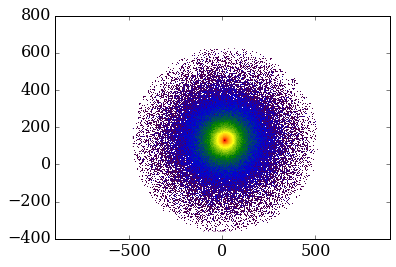

In [73]:
#scatter(lmc_pos_i[:,0], lmc_pos_i[:,2], s=0.1)
#axis('equal')

h = hist2d(lmc_pos_i[:,0], lmc_pos_i[:,2], bins=200, norm=LogNorm())
axis('equal')

In [74]:
index_mwvel_i = np.where(abs(vr_mw_i)<1000)[0]
index_mwvel_f = np.where(abs(vr_mw_f)<1000)[0]
index_lmcvel_i = np.where(abs(vr_lmc_i)<1000)[0]
index_lmcvel_f = np.where(abs(vr_lmc_f)<1000)[0]

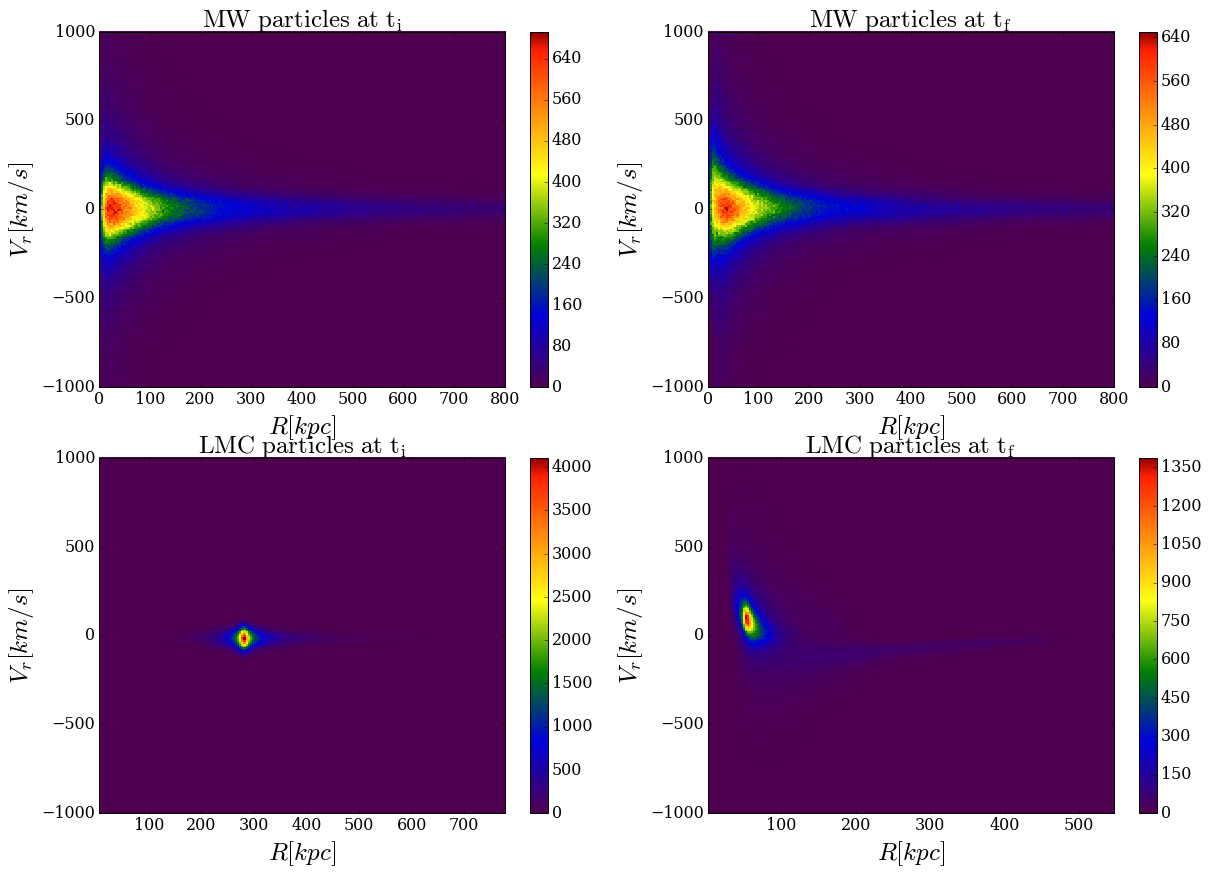

In [75]:
figure(figsize=(20, 14))
subplot(2, 2, 1)
title('$\mathrm{MW\ particles\ at\ t_i}$', fontsize=25)
h = hist2d(r_mw_i[index_mwvel_i], vr_mw_i[index_mwvel_i], bins=200)
#h = hist2d(r_mw_i, vr_mw_i, bins=200, norm=LogNorm())
colorbar()
#axis('equal')
ylim(-1000, 1000)
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


subplot(2, 2, 2)
title('$\mathrm{MW\ particles\ at\ t_f}$', fontsize=25)
h = hist2d(r_mw_f[index_mwvel_f], vr_mw_f[index_mwvel_f], bins=200)
colorbar()
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


subplot(2, 2, 3)
title('$\mathrm{LMC\ particles\ at\ t_i}$', fontsize=25)
h = hist2d(r_lmc_i[index_lmcvel_i], vr_lmc_i[index_lmcvel_i], bins=200)
colorbar()

xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)

subplot(2, 2, 4)
title('$\mathrm{LMC\ particles\ at\ t_f}$', fontsize=25)
h = hist2d(r_lmc_f[index_lmcvel_f], vr_lmc_f[index_lmcvel_f], bins=200)
colorbar()
xlabel('$R[kpc]$', fontsize=25)
ylabel('$V_r[km/s]$', fontsize=25)


In [76]:
r_i_all = np.concatenate([r_lmc_i[index_lmcvel_i], r_mw_i[index_mwvel_i]])
v_i_all = np.concatenate([vr_lmc_i[index_lmcvel_i], vr_mw_i[index_mwvel_i]])

r_f_all = np.concatenate([r_lmc_f[index_lmcvel_f], r_mw_f[index_mwvel_f]])
v_f_all = np.concatenate([vr_lmc_f[index_lmcvel_f], vr_mw_f[index_mwvel_f]])

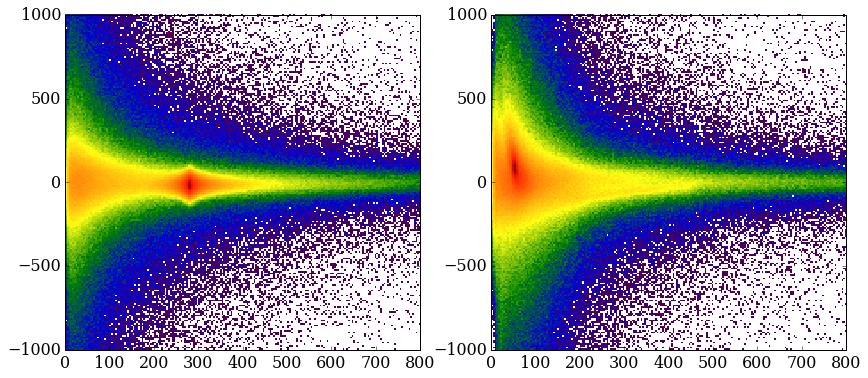

In [77]:
figure(figsize=(14, 6))
subplot(1, 2, 1)
h = hist2d(r_i_all, v_i_all, bins=200, norm=LogNorm())

subplot(1, 2, 2)
h = hist2d(r_f_all, v_f_all, bins=200, norm=LogNorm())


In [46]:
bbox = [[-89000, 89000],
        [-89000, 89000],
        [-89000, 89000]]
 

ds1 = yt.load('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', bounding_box=bbox)
ds1.index
ad1= ds1.all_data()

ds2 = yt.load('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', bounding_box=bbox)
ds2.index
ad2= ds2.all_data()




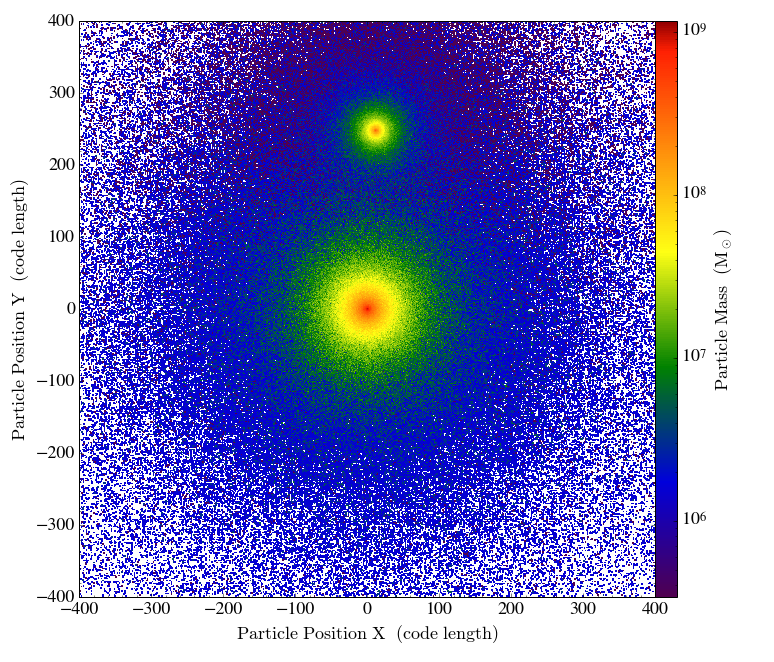

In [53]:
p = yt.ParticlePlot(ds1, ('PartType1','particle_position_x'), ('PartType1','particle_position_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
p.set_xlim(-400, 400)
p.set_ylim(-400, 400)
p.show()


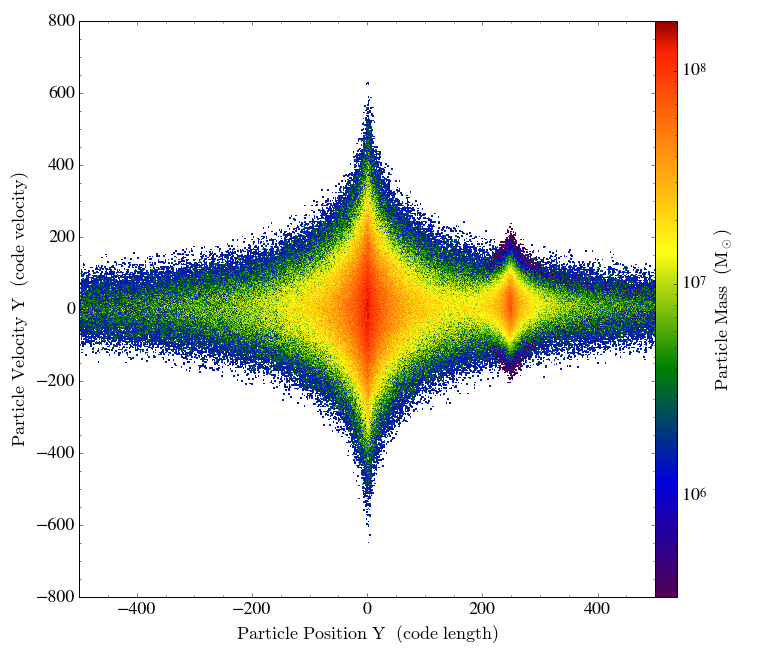

In [48]:
p = yt.ParticlePlot(ds1, ('PartType1','particle_position_y'), ('PartType1','particle_velocity_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()


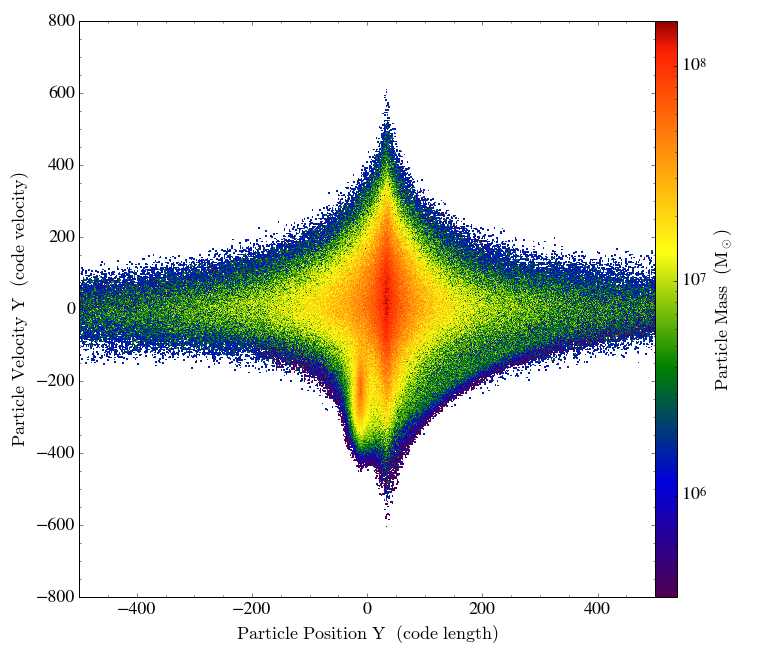

In [49]:
p = yt.ParticlePlot(ds2, ('PartType1','particle_position_y'), ('PartType1','particle_velocity_y'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
#p.set_xlim(-20, 20)
#p.set_ylim(-20, 20)
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()


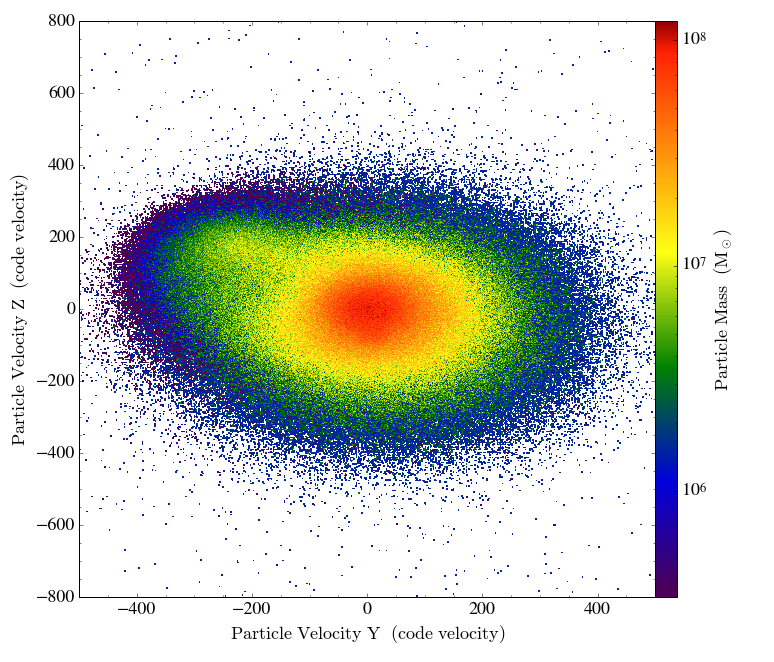

In [54]:
p = yt.ParticlePlot(ds2, ('PartType1','particle_velocity_y'), ('PartType1','particle_velocity_z'), ('PartType1','particle_mass'))
p.set_unit('particle_mass', 'Msun')
#p.set_xlim(-20, 20)
#p.set_ylim(-20, 20)
p.set_xlim(-500, 500)
p.set_ylim(-800, 800)
p.show()